In [10]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# To avoid truncating columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data and Extract Features and Target

In [2]:
train = pd.read_csv("vct_data/train_preprocessed.csv")
test = pd.read_csv("vct_data/test_preprocessed.csv")

features = [
    "Team A_Encoded", 
    "Team B_Encoded",

    "Team A H2H Win %",
    "Team B H2H Win %",

    "Team A Tournament Win %",
    "Team B Tournament Win %",

    "Recent Win %_TeamA",
    "Recent Win %_TeamB",

    "Team A Map Win %",
    "Team B Map Win %",

    "Round Win %_RollAvg_TeamA",
    "Round Win %_RollAvg_TeamB",

    "Attacker Win %_RollAvg_TeamA",
    "Attacker Win %_RollAvg_TeamB",

    "Overtime Win %_RollAvg_TeamA",
    "Overtime Win %_RollAvg_TeamB",

    "KDA_RollAvg_TeamA",
    "KDA_RollAvg_TeamB",

    "First Blood %_RollAvg_TeamA",
    "First Blood %_RollAvg_TeamB",

    "Headshot %_RollAvg_TeamA",
    "Headshot %_RollAvg_TeamB",

    "Clutches_RollAvg_TeamA",
    "Clutches_RollAvg_TeamB",

    "Econ_RollAvg_TeamA",
    "Econ_RollAvg_TeamB",
]

X_test = test[features]
y_test = test["Winner"]

X_test.head()

,Team A_Encoded,Team B_Encoded,Team A H2H Win %,Team B H2H Win %,Team A Tournament Win %,Team B Tournament Win %,Recent Win %_TeamA,Recent Win %_TeamB,Team A Map Win %,Team B Map Win %,Round Win %_RollAvg_TeamA,Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamB,KDA_RollAvg_TeamA,KDA_RollAvg_TeamB,First Blood %_RollAvg_TeamA,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamA,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamA,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamA,Econ_RollAvg_TeamB
0,0.447334,0.414839,0.5,0.5,0.500000,0.571429,0.4,0.6,0.200000,0.666667,0.440863,0.489425,0.450000,0.562500,0.000,0.025,1.301095,1.379461,0.513037,0.475159,0.2098,0.2452,1.6,1.8,50.04,52.34
1,0.572950,0.371567,1.0,0.0,0.533333,0.680000,0.3,0.4,0.666667,0.666667,0.459425,0.524396,0.500000,0.545014,0.025,0.000,1.312059,1.607471,0.460159,0.550017,0.2482,0.2510,1.8,1.4,51.30,57.50
2,0.628433,0.414839,0.0,1.0,0.680000,0.533333,0.6,0.7,0.666667,0.666667,0.524396,0.459425,0.545014,0.500000,0.000,0.025,1.607471,1.312059,0.550017,0.460159,0.2510,0.2482,1.4,1.8,57.50,51.30
3,0.572950,0.371567,0.5,0.5,0.500000,0.692308,0.3,0.4,0.600000,0.700000,0.486508,0.497312,0.491667,0.520014,0.025,0.000,1.367839,1.434472,0.472659,0.531267,0.2430,0.2582,1.9,1.4,52.70,54.70
4,0.628433,0.414839,0.5,0.5,0.692308,0.500000,0.6,0.7,0.700000,0.600000,0.497312,0.486508,0.520014,0.491667,0.000,0.025,1.434472,1.367839,0.531267,0.472659,0.2582,0.2430,1.4,1.9,54.70,52.70


In [3]:
# Scaling for Logistic Regression
scaler = StandardScaler()
X_train = train[features]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load Pretrained Models

In [4]:
logreg = joblib.load("models/logreg_optuna.pkl")
rf = joblib.load("models/rf_optuna.pkl")
xgb = joblib.load("models/xgb_optuna.pkl")

print("Models loaded successfully")

Models loaded successfully


# Evaluate Prediction Performance

In [16]:
def evaluate_predictions(model, X_test, y_test):
    # Predict class labels
    y_pred = model.predict(X_test)
    
    # Predict probabilities for ROC AUC calculation
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    return {
        "Model": model.__class__.__name__,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1": round(f1_score(y_test, y_pred), 4),
        "ROC AUC": round(roc_auc_score(y_test, y_pred_proba), 4)
    }

# Store results for each model
results = []

for model in [logreg, rf, xgb]:
    if model == logreg:
        results.append(evaluate_predictions(model, X_test_scaled, y_test))
    else:
        results.append(evaluate_predictions(model, X_test, y_test))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC AUC"])
results_df

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,LogisticRegression,0.6088,0.6095,0.6062,0.6078,0.6544
1,RandomForestClassifier,0.6199,0.6184,0.6266,0.6224,0.6654
2,XGBClassifier,0.6162,0.6152,0.6210,0.6181,0.6640


# Confusion Matrixes

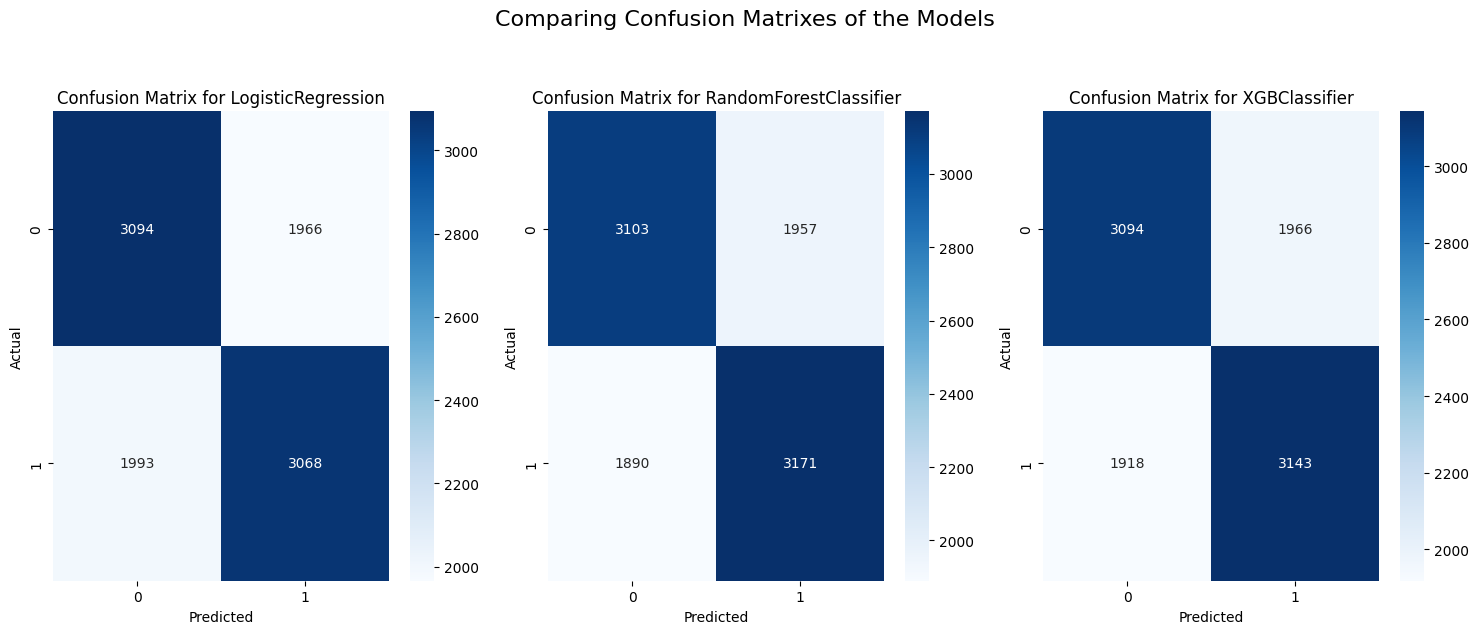

In [20]:
def plot_confusion_matrices(models, X_test, X_test_scaled, y_test):
    fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 6))

    fig.suptitle('Comparing Confusion Matrixes of the Models', fontsize=16, y=1.05)
    
    for i, model in enumerate(models):
        if model == logreg:
            y_pred = model.predict(X_test_scaled)
        else:
            y_pred = model.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred.round())
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
        axes[i].set_title(f'Confusion Matrix for {model.__class__.__name__}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

models = [logreg, rf, xgb]
plot_confusion_matrices(models, X_test, X_test_scaled, y_test)


# Visualizing ROC-AUC Curve

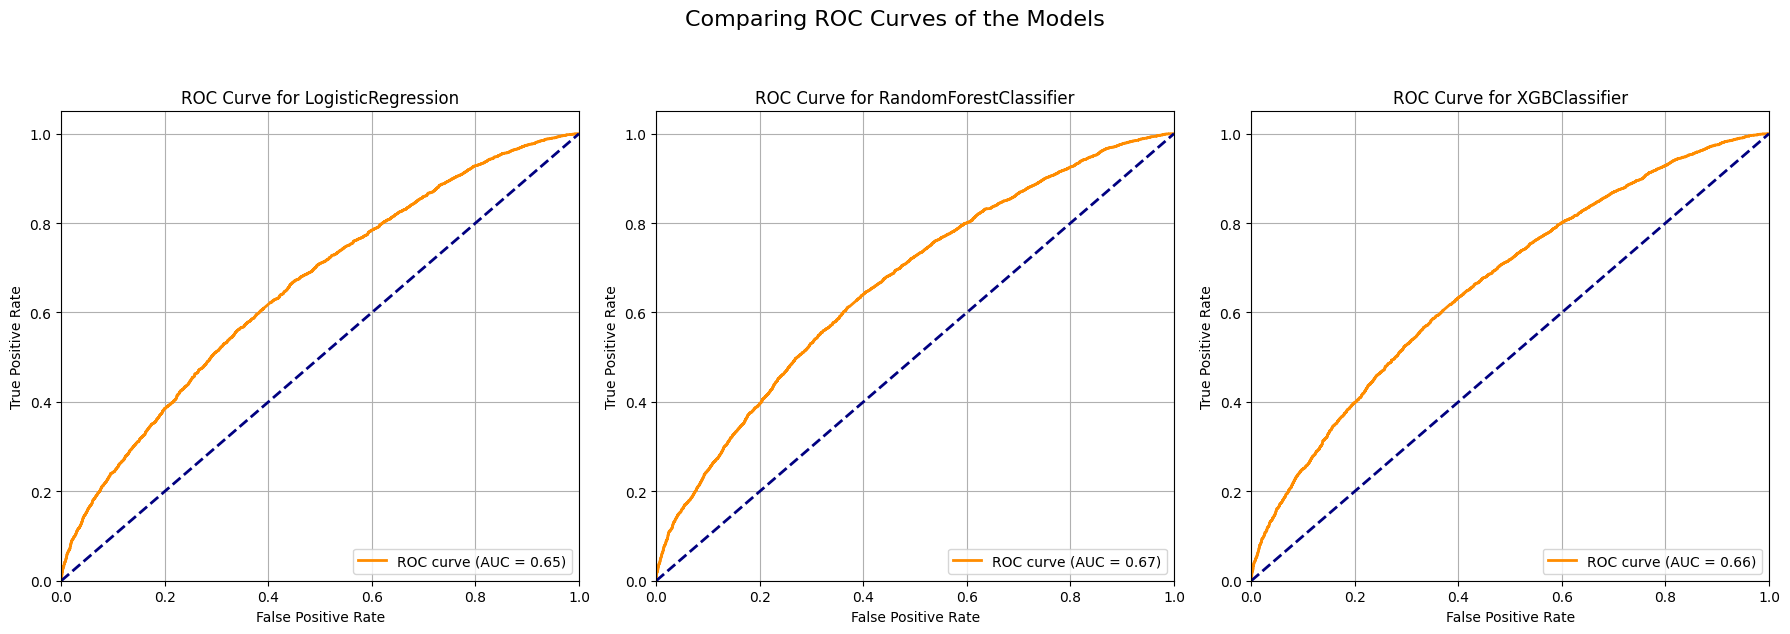

In [21]:
def plot_roc_curves(models, X_test, X_test_scaled, y_test):
    fig, axes = plt.subplots(1, len(models), figsize=(6 * len(models), 6))

    fig.suptitle('Comparing ROC Curves of the Models', fontsize=16, y=1.05)
    
    for i, model in enumerate(models):
        if model == logreg:
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate the ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve in the i-th subplot
        axes[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(f'ROC Curve for {model.__class__.__name__}')
        axes[i].legend(loc="lower right")
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

models = [logreg, rf, xgb]
plot_roc_curves(models, X_test, X_test_scaled, y_test)


# Verdict

The best model among the three is the **Random Forest Classifier** considering it has the highest performance in terms of accuracy, precision, recall, F1, and ROC-AUC. Additionally, this model had the highest number of correct predictions based on its confusion matrix, which is 3,274 correctly predicted matches. Finally, the RF model demonstrated the best ROC-AUC curve with a value of 0.67. Therefore, the **Random Forest Classifier** will be used as the predictive model for informing betting strategies in the simulated betting environment.